# House Price Prediction - Advanced Regression Problem

Steps - 
1. Preprocess + EDA + feature selection
2. Extract input and output columns
3. Scale the values
4. Train the model on train.csv data
5. Evaluate the model/ model selection

All the lifecycle in a data science project
1. Data analysis
2. feature engineering
3. feature selection
4. model building
5. model deployment

***Importing Libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
df_train = pd.read_csv('train.csv')
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
df_test = pd.read_csv('test.csv')
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

# Understanding Data -


In [4]:
#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

**How big is data after dropping ID column**

In [5]:
df_train.shape

(1460, 80)

In [6]:
df_test.shape

(1459, 79)

**How does the data look like**

In [7]:
df_train.sample(4)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
220           20       RL         73.0     8990   Pave   NaN      IR1   
374           60       RL         65.0     8200   Pave   NaN      Reg   
1160         160       RL         24.0     2280   Pave   NaN      Reg   
1051          20       RL        103.0    11175   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
220          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
374          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1160         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1051         Lvl    AllPub    Corner       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
220        Norm     1Fam     1Story            7            5       2006   
374        Norm     1Fam     2Story            7            5       2003   
1160       Norm    Twnhs     2Story            6            5       1978   
1051       Norm     1Fam     1Story            7            5       2007   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
220           2006     Gable  CompShg     VinylSd     VinylSd       None   
374           2004     Gable  CompShg     VinylSd     VinylSd       None   
1160          1978     Gable  CompShg     Plywood     Brk Cmn       None   
1051          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
220          0.0        Gd        TA      PConc       Gd       TA   
374          0.0        Gd        TA      PConc       Gd       TA   
1160         0.0        TA        TA     CBlock       Gd       TA   
1051         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
220            Mn          Unf           0          Unf           0   
374            No          Unf           0          Unf           0   
1160           No          ALQ         311          Unf           0   
1051           Av          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
220        1498         1498    GasA        Ex          Y      SBrkr   
374         847          847    GasA        Ex          Y      SBrkr   
1160        544          855    GasA        Fa          Y      SBrkr   
1051       1316         1316    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
220       1498         0             0       1498             0             0   
374        847      1081             0       1928             0             0   
1160       855       601             0       1456             0             0   
1051      1316         0             0       1316             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
220          2         0             2             1          Gd   
374          2         1             4             1          Gd   
1160         2         1             3             1          TA   
1051         2         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
220              5        Typ           0         NaN     Attchd       2006.0   
374              8        Typ           1          Gd    BuiltIn       2003.0   
1160             7        Typ           1          TA     Attchd       1978.0   
1051             6        Typ           1          Gd     Attchd       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
220           RFn           2         675         TA         TA          Y   
374           Fin           2         434         TA         TA          Y   
1160          Unf           2         440         TA     

In [8]:
df_test.sample(4)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1078          20       RL         65.0     8769   Pave   NaN      Reg   
830           60       RL        110.0    13440   Pave   NaN      Reg   
564           60       RL        105.0    11025   Pave   NaN      Reg   
1334          50       RM         51.0     6120   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1078         Lvl    AllPub       FR2       Gtl      CollgCr       Norm   
830          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
564          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
1334         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1078       Norm     1Fam     1Story            7            5       2005   
830        Norm     1Fam     2Story            8            5       2006   
564        Norm     1Fam     1.5Fin            9            5       1993   
1334       Norm     1Fam     1.5Fin            5            7       1930   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1078          2005     Gable  CompShg     VinylSd     VinylSd       None   
830           2007       Hip  CompShg     VinylSd     VinylSd    BrkFace   
564           1994       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
1334          1984     Gable  CompShg     MetalSd     MetalSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1078         0.0        Gd        TA      PConc       Gd       TA   
830        190.0        Gd        TA      PConc       Ex       TA   
564        568.0        Gd        TA      PConc       Gd       TA   
1334         0.0        TA        Gd     BrkTil       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1078           Av          GLQ       709.0          Unf         0.0   
830            No          Unf         0.0          Unf         0.0   
564            Gd          BLQ       520.0          Unf         0.0   
1334           No          Unf         0.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1078      460.0       1169.0    GasA        Ex          Y      SBrkr   
830      1108.0       1108.0    GasA        Ex          Y      SBrkr   
564      1328.0       1848.0    GasA        Ex          Y      SBrkr   
1334      741.0        741.0    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1078      1190         0             0       1190           1.0           0.0   
830       1148      1402             0       2550           0.0           0.0   
564       1827       959             0       2786           1.0           0.0   
1334       741       583             0       1324           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1078         2         0             2             1          Gd   
830          2         1             4             1          Ex   
564          2         1             4             1          Gd   
1334         1         0             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1078             5        Typ           0         NaN     Attchd       2005.0   
830             11        Typ           1          Gd    BuiltIn       2006.0   
564             10        Typ           1          Ex     Attchd       1993.0   
1334             7        Typ           0         NaN     Detchd       1930.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1078          RFn         2.0       578.0         TA         TA          Y   
830           Fin         3.0       670.0         TA         TA          Y   
564           Fin         2.0       636.0         TA     

**What is data type of cols**

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

**Are there any missing values**

In [10]:
#it tells no. of missing values of each column in pandas series
pd.pandas.set_option('display.max_rows',None)
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

**How does data look mathematically**

In [11]:
#insights only on numeric data
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

**Are there any duplicate values?**

In [12]:
df_train.duplicated().sum()

0

**How is the correlation between columns**

In [13]:
#works on numeric columns
#correlation-> if one thing inc or dec what's impact on others
#values range from -1 to +1
#whatever negative it is it means it is inversely correlated
#positive means positive correlation directly proportional
df_train.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

In [14]:
df_train.corr()['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [15]:
df_train.shape

(1460, 80)

In [16]:
df_test.shape

(1459, 79)

# In data analysis we will analyze to find
1. Missing values
2. All the numerical variables
3. Distribution of the numerical variables
4. Categorical variables
5. Cardinality of categorical variables
6. Outliers
7. Relationship between independent and dependent(SalePrice)

# Missing values

In [17]:
#list of features which has missing values atleast 1 missing value
features_with_na =[features for features in df_train.columns if df_train[features].isnull().sum()>1]

#iterating through each and every feature, 
#printing the feature name and then whatever null value mean is getting, rounding it up
#/the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df_train[feature].isnull().mean()*100, 4), '  % missing values')
    

LotFrontage 17.7397   % missing values
Alley 93.7671   % missing values
MasVnrType 0.5479   % missing values
MasVnrArea 0.5479   % missing values
BsmtQual 2.5342   % missing values
BsmtCond 2.5342   % missing values
BsmtExposure 2.6027   % missing values
BsmtFinType1 2.5342   % missing values
BsmtFinType2 2.6027   % missing values
FireplaceQu 47.2603   % missing values
GarageType 5.5479   % missing values
GarageYrBlt 5.5479   % missing values
GarageFinish 5.5479   % missing values
GarageQual 5.5479   % missing values
GarageCond 5.5479   % missing values
PoolQC 99.5205   % missing values
Fence 80.7534   % missing values
MiscFeature 96.3014   % missing values


**Since there are many missing values we need to find the relationship between missing values and Sales Price**

Plotting some diagrams for this relationhsip

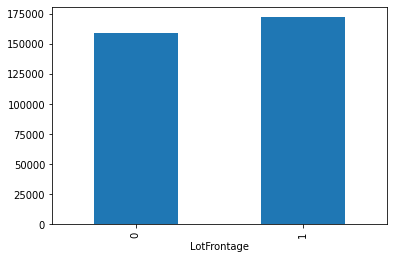

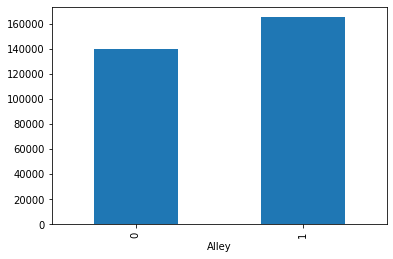

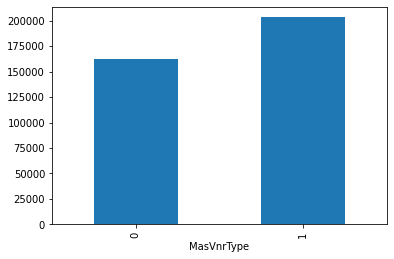

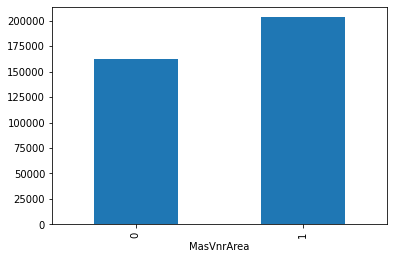

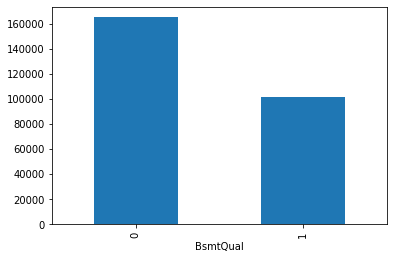

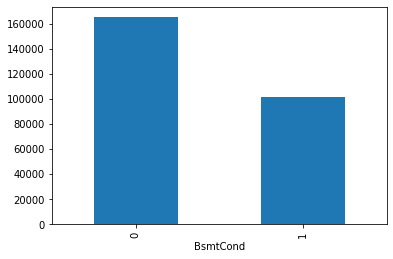

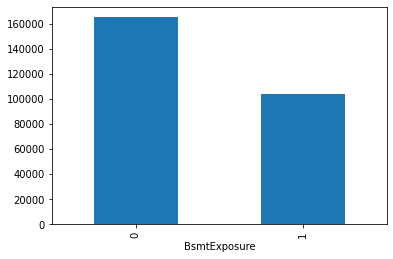

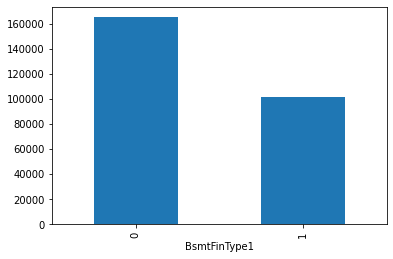

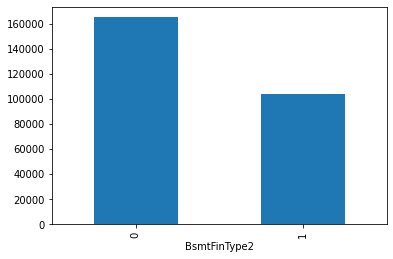

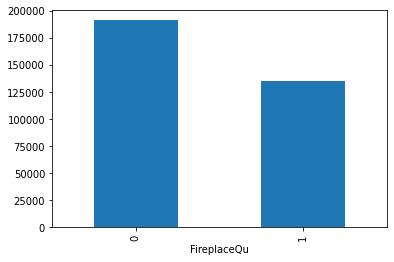

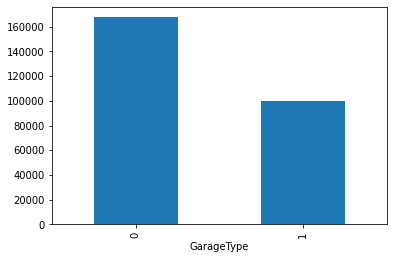

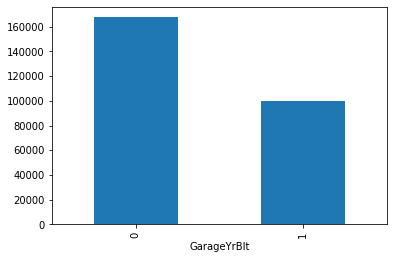

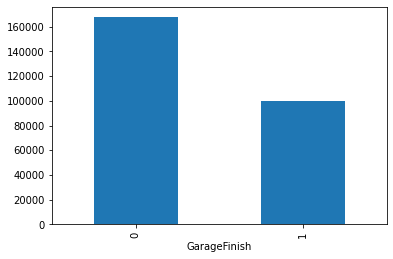

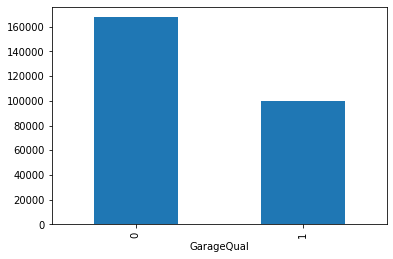

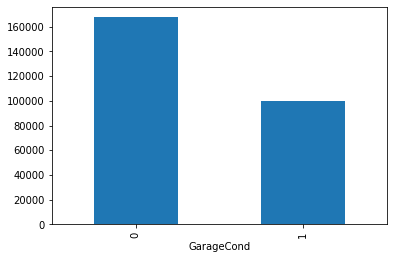

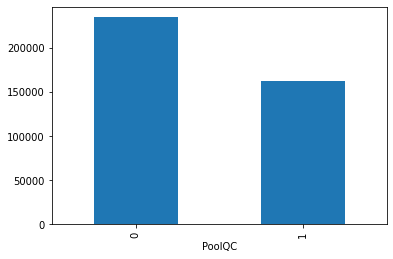

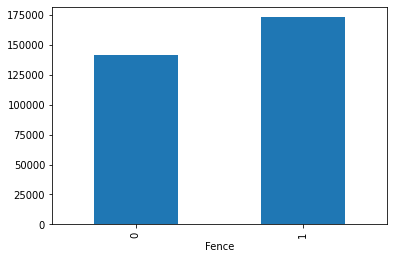

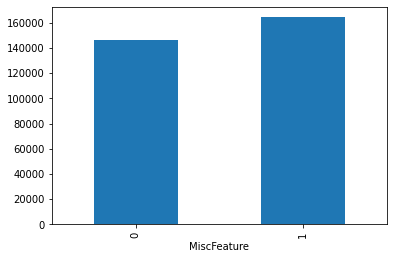

In [18]:
#iterating through all the features that have nan values
#making df copy in variable data
for feature in features_with_na:
    data = df_train.copy()
    
    #making a variable that indicates 1 if the observation is missing/null value else converting it as 0
    #reason - to create countplot, plot with respect to Sales Price on y-axis
    #if there are lot of missing values whether the salesPrice is increasing or not,
    #indicates whether it's important or not, it can be inversely proportional also if so many missing values
    #price may be low, we can check the impact of count of missing values on SalesPrice 
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    #calculating the mean SalesPrice where the information is missing or present
    #groupby wrt feature and wrt feature of salesPrice finding the median and plotting it as a bar
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

when the nan values has higher number based on nan values the house price (median) is high. 
whenever there is nan values it has higher median Sales price

**Here with the relation between missing values and the dependent variable is clearly visible**

# Numerical Variables

In [19]:
#list of numerical variables
numerical_features= [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

#visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables:  37


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

***Temporal variables(datetime variables)***

we have 4 year variables. we have extract information from the datetime variables like no of years or no of days. eg. specific scenario is can be difference between the year the house was built and the year house was sold. will perform analysis in the feature Engineering.

In [20]:
#list of variables that contain year information
year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [21]:
#getting the content of these year variables
for feature in year_feature:
    print(feature, df_train[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

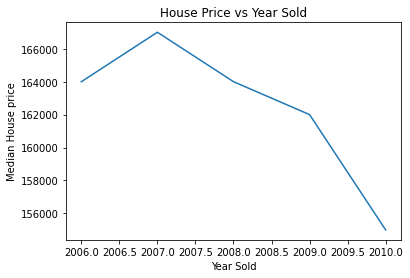

In [22]:
#checking whether there is a relation between year the house is sold and Sale price

#grouping by year sold feature and then we are actually considering with each and every group for this year sold 
#finding the median of SalesPrice and plot it.
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House price')
plt.title("House Price vs Year Sold")

**Price is decreasing as the year is going on. this can't be just true. finding some more information**

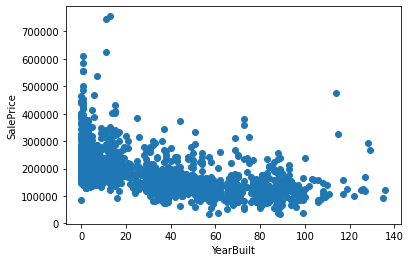

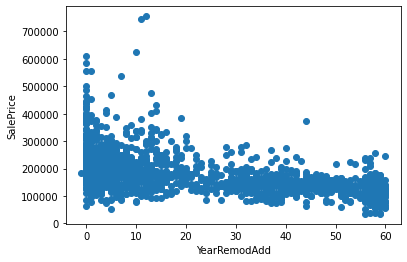

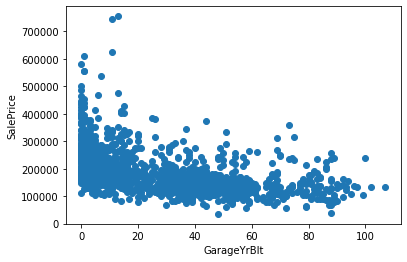

In [23]:
## Here we will compare the difference between All years feature with SalePrice

#run a for loop for each and every feature
for feature in year_feature:
    
    #if feature is not yrsold
    if feature!='YrSold':
        data=df_train.copy()
        
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [24]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [25]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [26]:
df_train[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

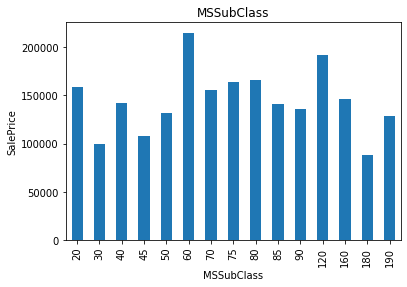

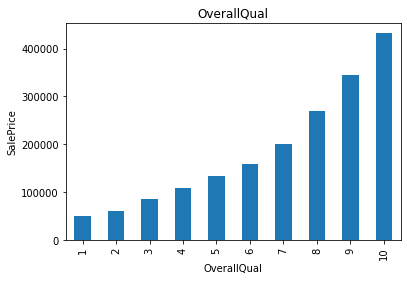

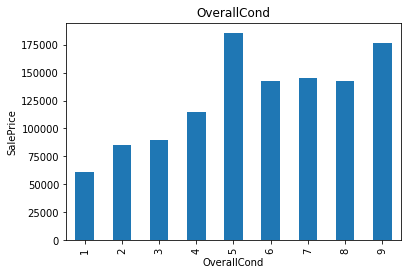

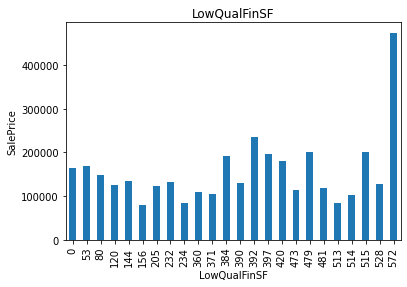

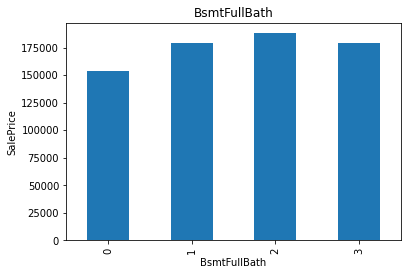

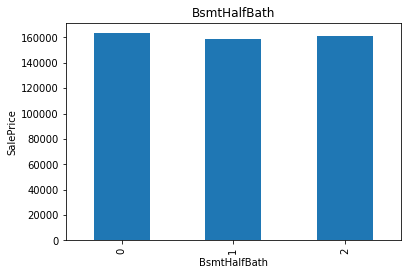

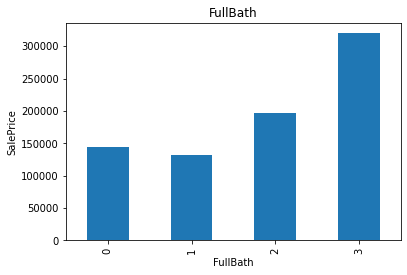

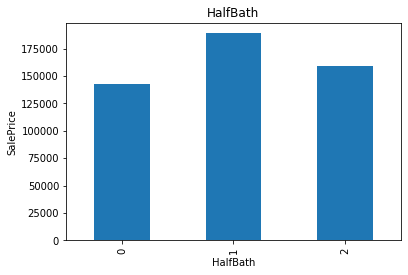

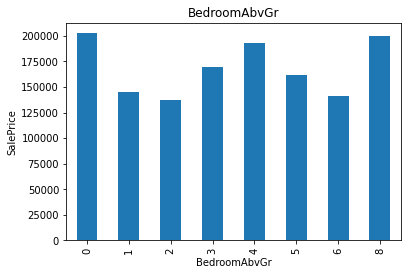

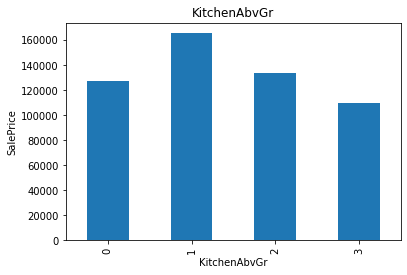

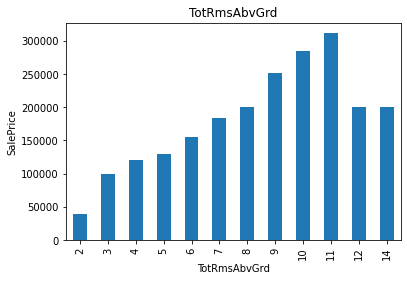

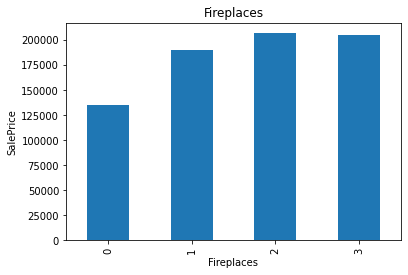

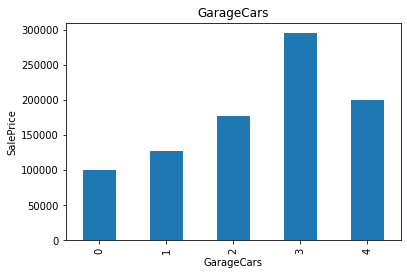

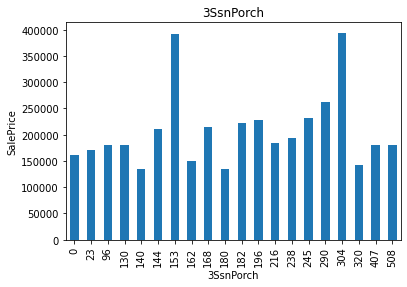

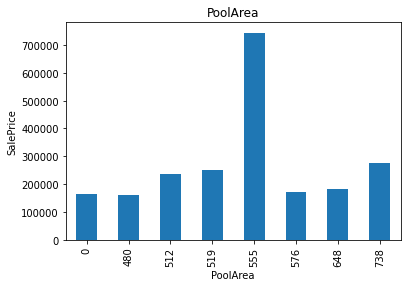

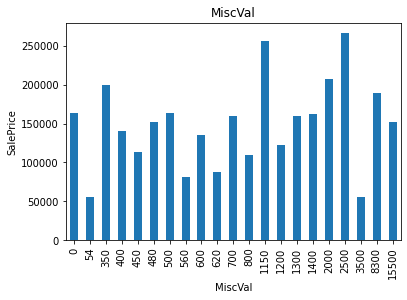

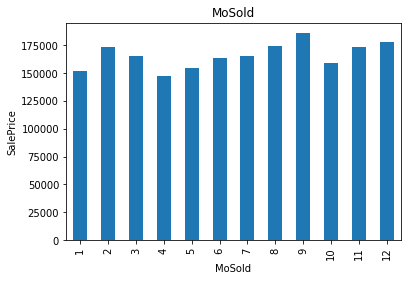

In [27]:
## Lets Find the relationship between them and Sale PRice

for feature in discrete_feature:
    data=df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [28]:
## There is a relationship between variable number and SalePrice

# Continuous Variables

In [29]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


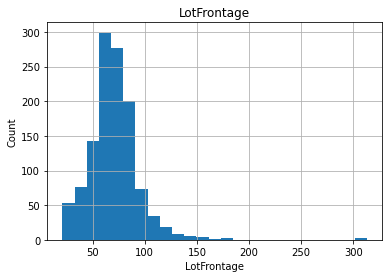

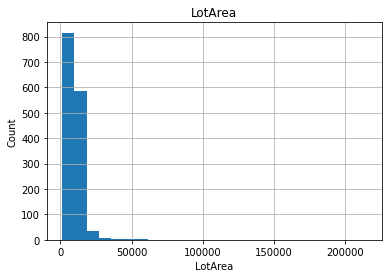

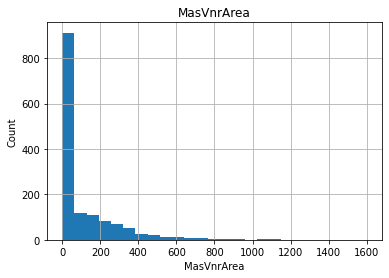

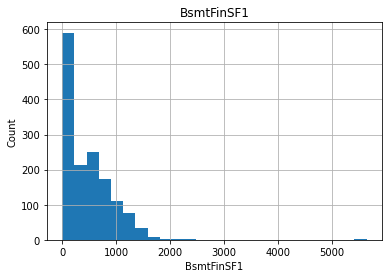

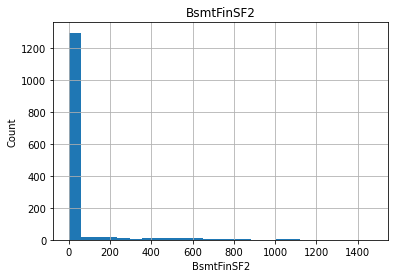

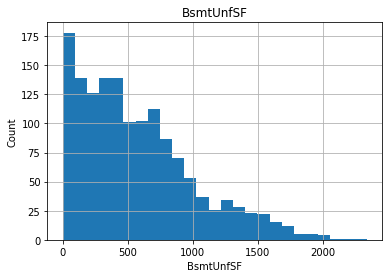

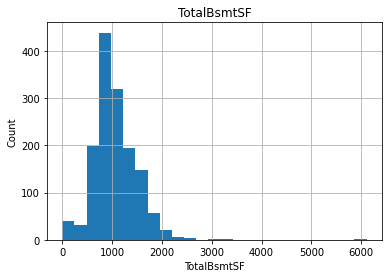

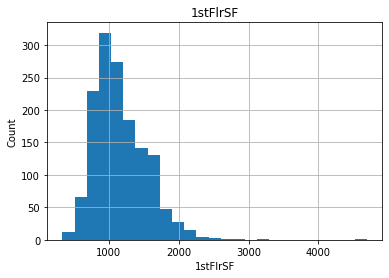

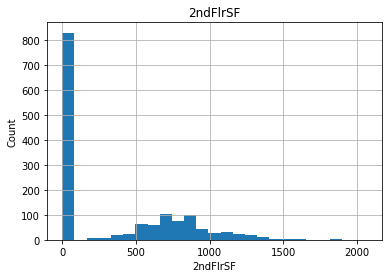

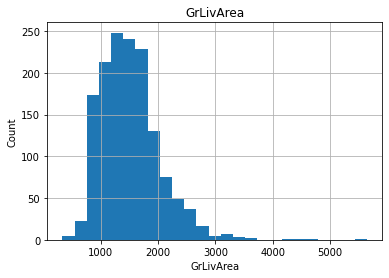

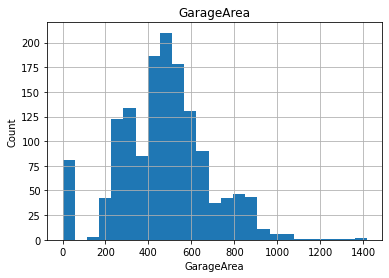

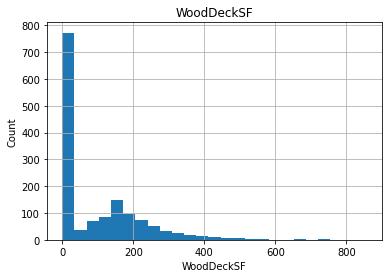

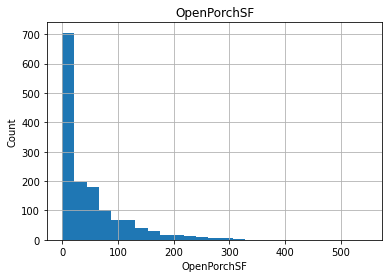

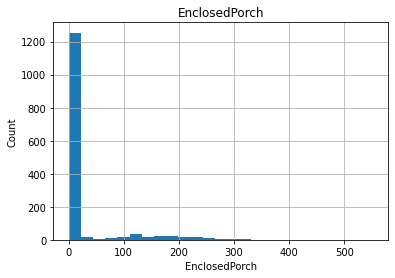

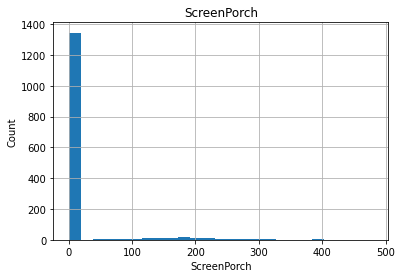

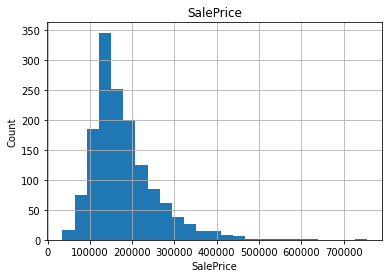

In [30]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df_train.copy()
    
    #finding distribution of continuous variable we use histogram
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

**skewed data**

***using log normalisation, will convert in gaussion or normal distribution***

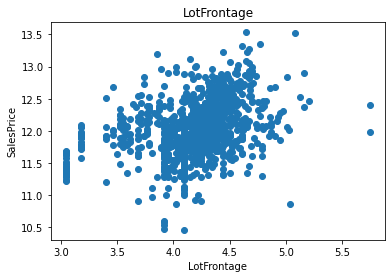

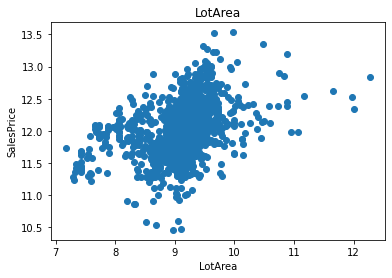

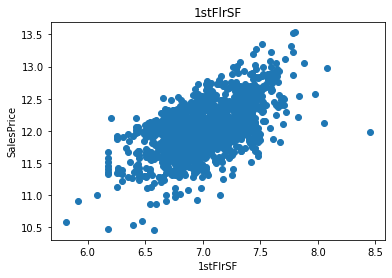

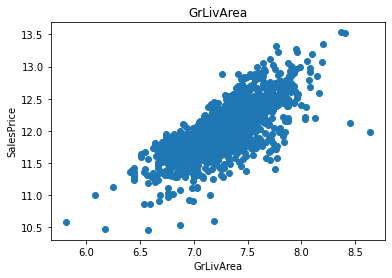

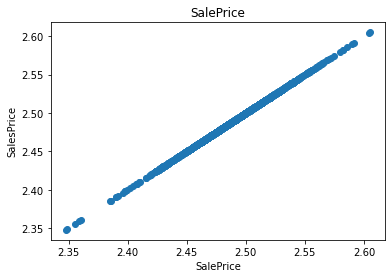

In [31]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        
        #handling logarithmic conditions
        #making log normal transformation
        
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

scatterplot-> with salesprice give u straight line for other features monotonic relationship, positive correlation
#after log normal distribution, if x inc y inc

# Outliers

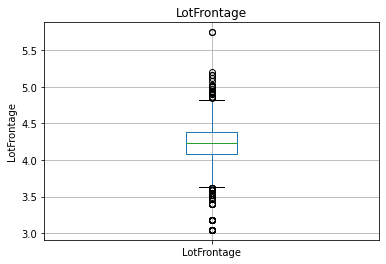

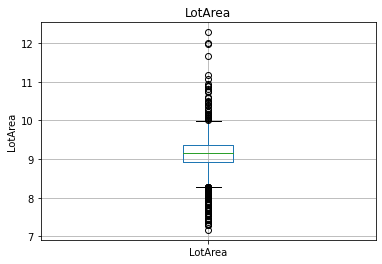

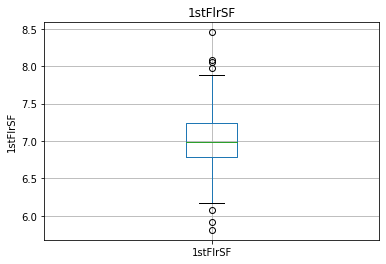

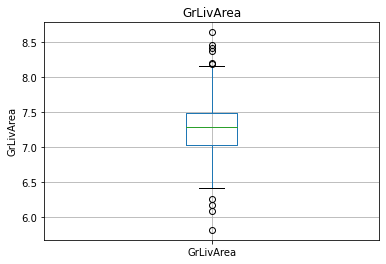

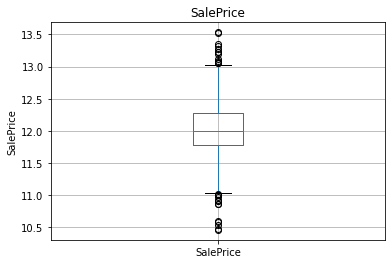

In [32]:
for feature in continuous_feature:
    data=df_train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [33]:
#this doesn't work for categorical features, use this only for continuous variable

# Categorical Variables

In [34]:
categorical_features=[feature for feature in df_train.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [35]:
df_train[categorical_features].sample(5)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
1275       RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
1323       RL   Pave   NaN      Reg         HLS    AllPub    Inside       Gtl   
303        RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
436        RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1116       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
1275        NAmes      Feedr       Norm   Duplex     2Story     Gable   
1323      BrkSide       Norm       Norm     1Fam     1Story       Hip   
303       CollgCr       Norm       Norm     1Fam     1Story     Gable   
436       OldTown       Norm       Norm     1Fam     1.5Fin     Gable   
1116      Gilbert       Norm       Norm     1Fam       SLvl       Hip   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
1275     Roll     AsbShng     AsbShng      Stone        TA        TA   
1323  CompShg     VinylSd     VinylSd       None        Fa        TA   
303   CompShg     VinylSd     VinylSd       None        TA        TA   
436   CompShg      Stucco      Stucco       None        TA        TA   
1116  CompShg     VinylSd     VinylSd       None        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
1275     CBlock       TA       TA           No          Rec          Unf   
1323     CBlock       TA       TA           No          LwQ          Unf   
303       PConc       TA       TA           No          ALQ          Unf   
436      BrkTil       Fa       TA           No          Unf          Unf   
1116      PConc       Gd       TA           No          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
1275    GasA        Gd          Y      FuseA          TA        Typ   
1323    GasA        Gd          Y      SBrkr          Fa        Typ   
303     GasA        TA          Y      SBrkr          TA        Typ   
436     GasA        TA          Y      FuseA          TA        Typ   
1116    GasA        Ex          Y      SBrkr          Gd        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
1275         NaN     Detchd          Unf         TA         Fa          Y   
1323         NaN        NaN          NaN        NaN        NaN          Y   
303          NaN     Attchd          Unf         TA         TA          Y   
436          NaN     Detchd          Unf         TA         TA          Y   
1116          TA    BuiltIn          Fin         TA         TA          Y   

     PoolQC Fence MiscFeature SaleType SaleCondition  
1275    NaN   NaN         NaN       WD        Normal  
1323    NaN   NaN         NaN       WD        Normal  
303     NaN  GdWo         NaN       WD       Abnorml  
436     NaN   NaN         NaN       WD        Normal  
1116    NaN   NaN         NaN       WD        Normal

In [36]:
for feature in categorical_features:
    print('feature is {}    categories {}'.format(feature,len(df_train[feature].unique())))

feature is MSZoning    categories 5
feature is Street    categories 2
feature is Alley    categories 3
feature is LotShape    categories 4
feature is LandContour    categories 4
feature is Utilities    categories 2
feature is LotConfig    categories 5
feature is LandSlope    categories 3
feature is Neighborhood    categories 25
feature is Condition1    categories 9
feature is Condition2    categories 8
feature is BldgType    categories 5
feature is HouseStyle    categories 8
feature is RoofStyle    categories 6
feature is RoofMatl    categories 8
feature is Exterior1st    categories 15
feature is Exterior2nd    categories 16
feature is MasVnrType    categories 5
feature is ExterQual    categories 4
feature is ExterCond    categories 5
feature is Foundation    categories 6
feature is BsmtQual    categories 5
feature is BsmtCond    categories 5
feature is BsmtExposure    categories 5
feature is BsmtFinType1    categories 7
feature is BsmtFinType2    categories 7
feature is Heating    cat

In [37]:
## Find out the relationship between categorical variable and dependent feature SalesPrice

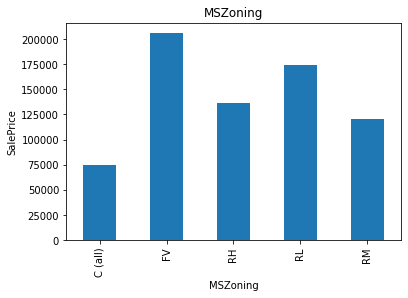

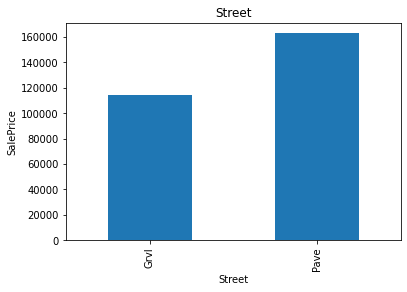

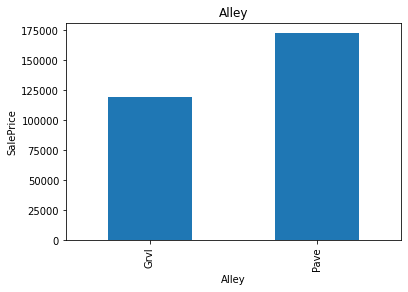

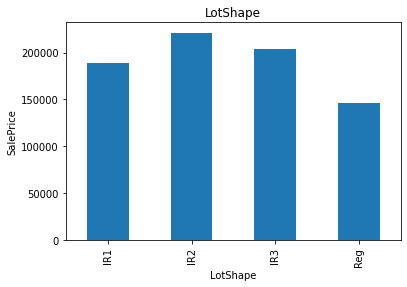

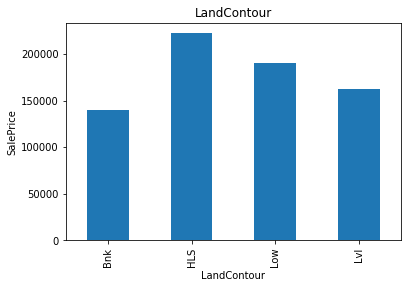

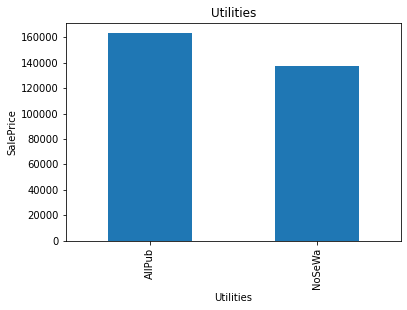

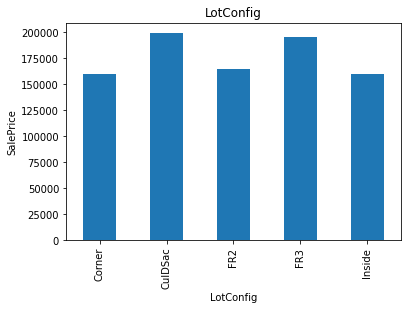

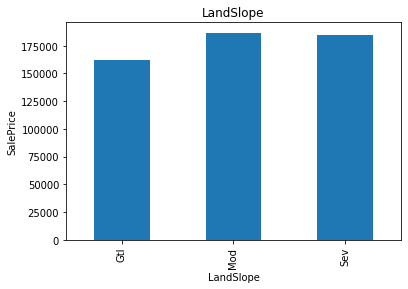

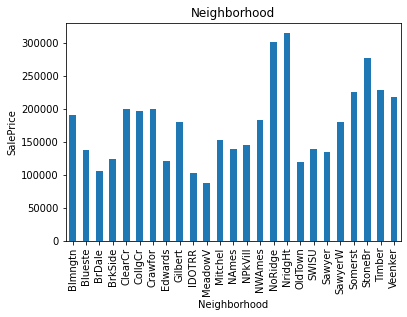

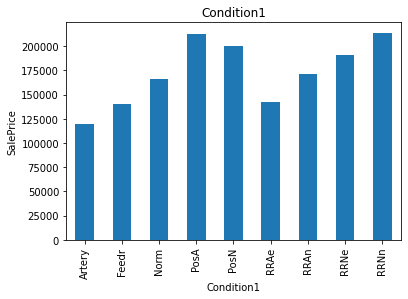

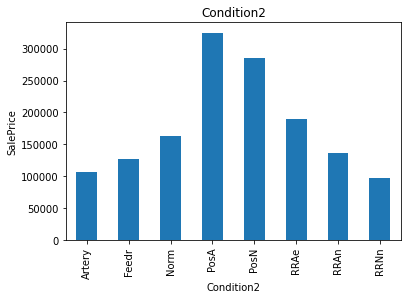

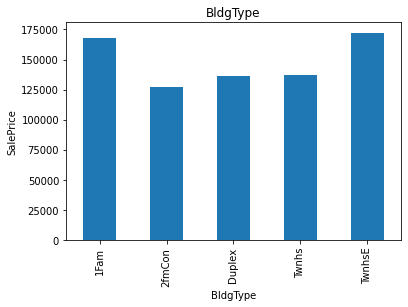

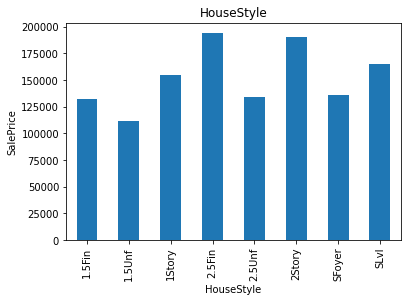

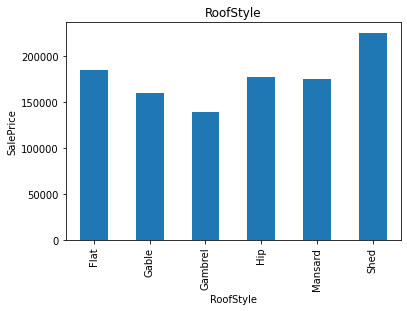

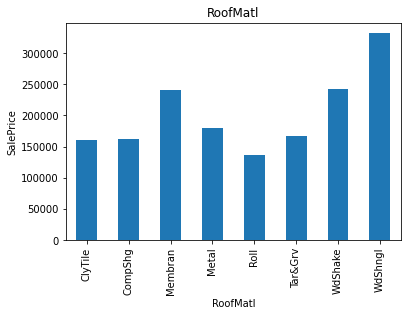

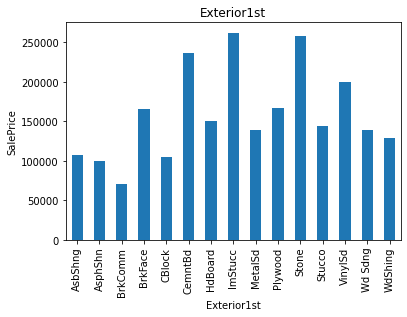

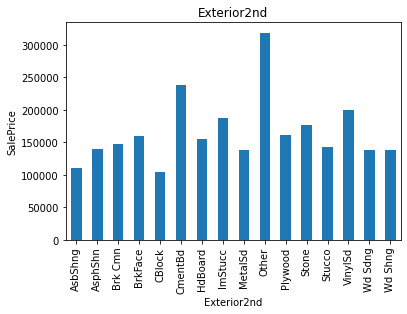

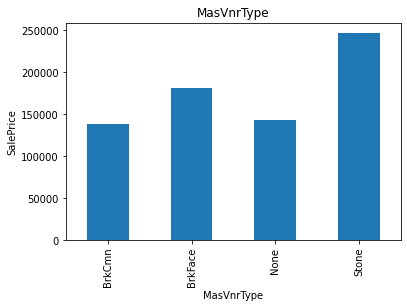

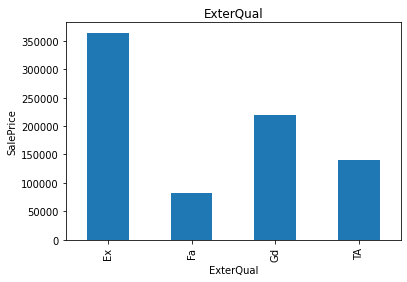

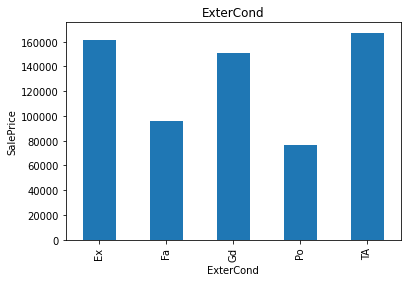

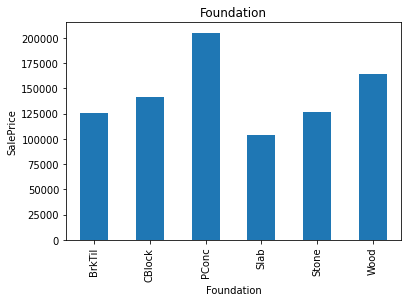

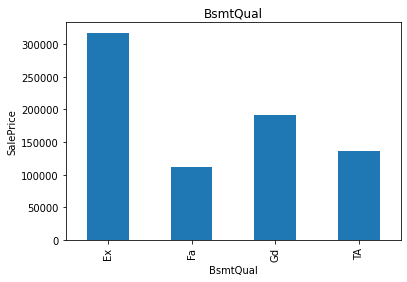

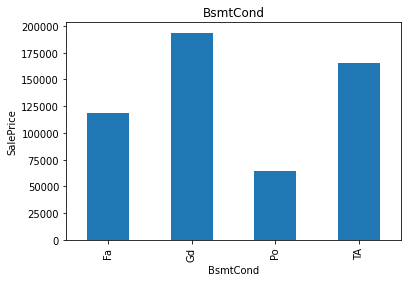

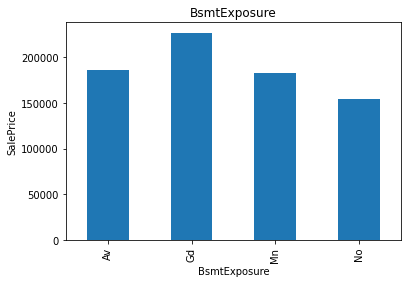

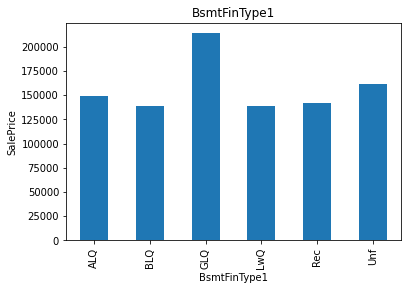

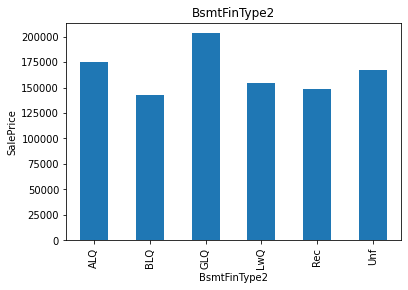

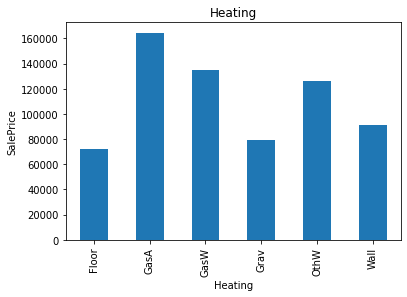

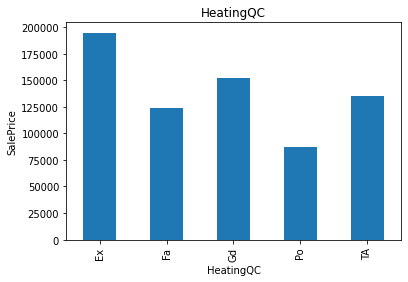

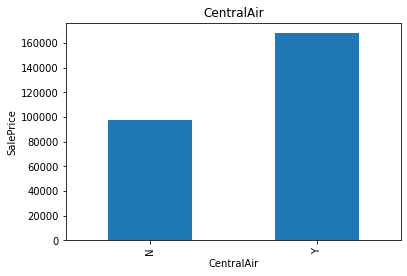

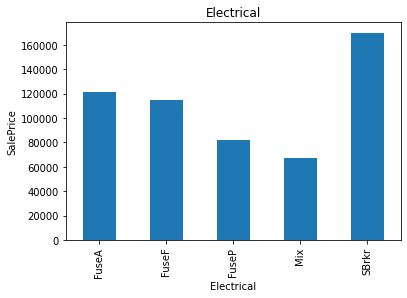

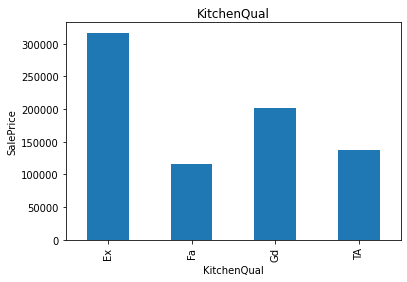

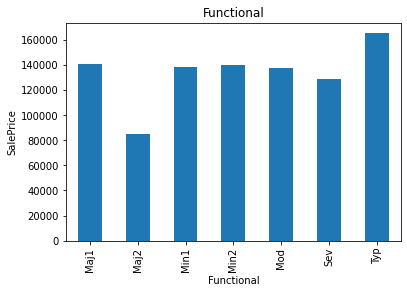

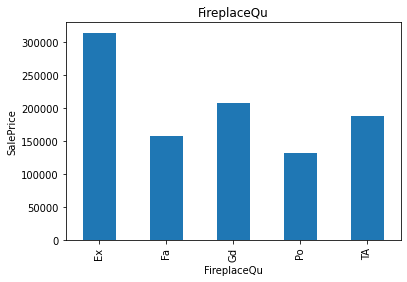

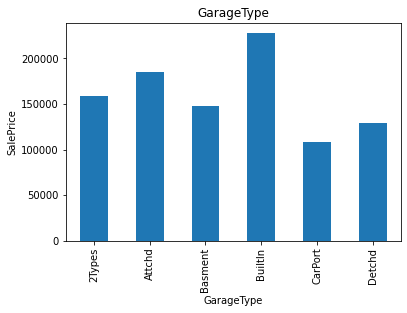

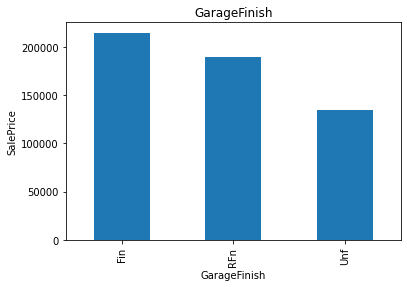

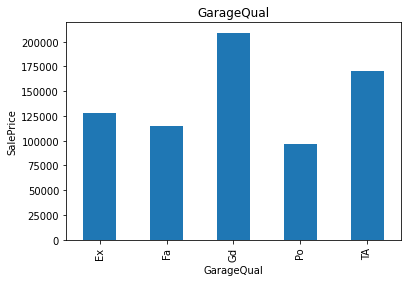

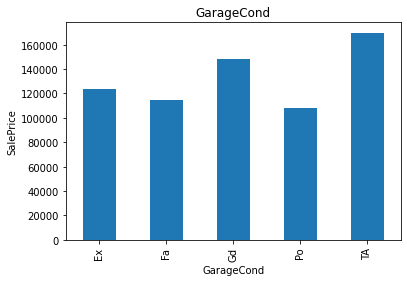

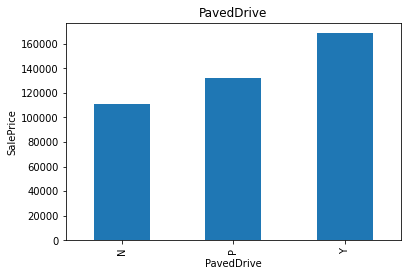

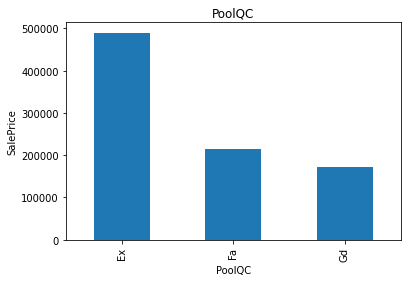

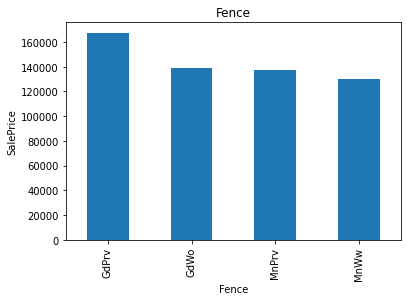

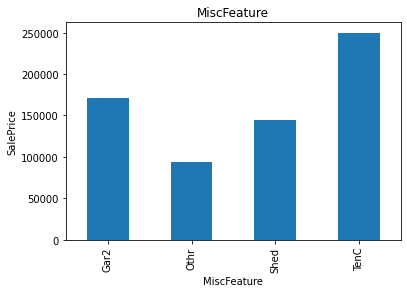

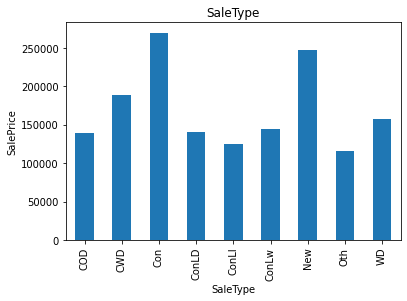

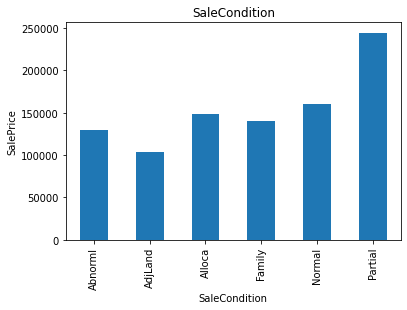

In [38]:
for feature in categorical_features:
    data=df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering 

We will be performing all the below steps in Feature Engineering

    Missing values - WRT categorical features and then wrt numerical
    Temporal variables
    Categorical variables: remove rare labels
    Standarise the values of the variables to the same range

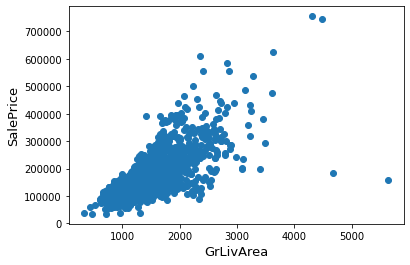

In [39]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

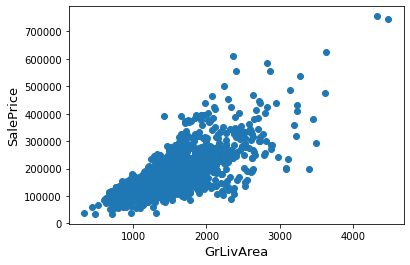

In [40]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 180932.92 and sigma = 79467.79


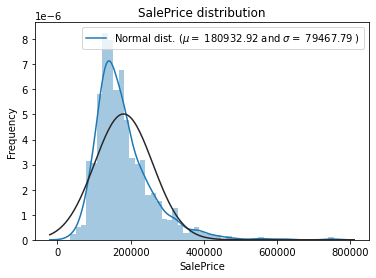

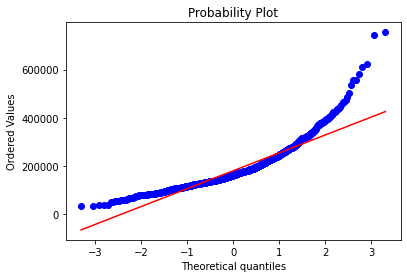

In [41]:
# target variable

from scipy import stats
from scipy.stats import norm

sns.distplot(df_train['SalePrice'] , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()

c:\users\simran\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 12.02 and sigma = 0.40


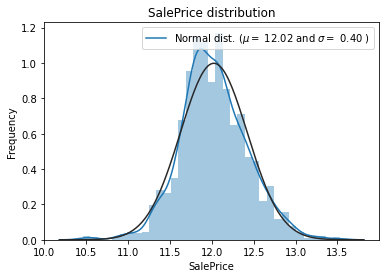

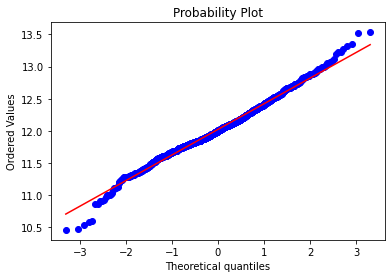

In [42]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Check the new distribution 
sns.distplot(df_train['SalePrice'] , fit = norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)
plt.show()

In [43]:
# combining the train and test datasets for preprocessing

ntrain = df_train.shape[0]
ntest = df_test.shape[0]

# creating y-train
y_train = df_train.SalePrice.values

combined_data = pd.concat([df_train, df_test])
combined_data.drop(['SalePrice'], axis = 1, inplace =  True)

# printing the shape of new dataset
combined_data.shape

(2917, 79)

In [44]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in combined_data.columns if combined_data[feature].isnull().sum()>1 and combined_data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(combined_data[feature].isnull().mean()*100,4)))

MSZoning: 0.1371% missing values
Alley: 93.2122% missing values
Utilities: 0.0686% missing values
MasVnrType: 0.8228% missing values
BsmtQual: 2.7768% missing values
BsmtCond: 2.8111% missing values
BsmtExposure: 2.8111% missing values
BsmtFinType1: 2.7083% missing values
BsmtFinType2: 2.7425% missing values
Functional: 0.0686% missing values
FireplaceQu: 48.6802% missing values
GarageType: 5.3822% missing values
GarageFinish: 5.4508% missing values
GarageQual: 5.4508% missing values
GarageCond: 5.4508% missing values
PoolQC: 99.6915% missing values
Fence: 80.4251% missing values
MiscFeature: 96.4004% missing values


In [45]:
## Replace missing value with a new label
def replace_cat_feature(combined_data,features_nan):
    data=combined_data.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

combined_data=replace_cat_feature(combined_data,features_nan) 
combined_data
combined_data[features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [46]:
combined_data.sample(10)

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
795           60       RL         70.0     8400   Pave  Missing      Reg   
416           20       RL         65.0    10739   Pave  Missing      IR1   
1050          20       RL         73.0     8993   Pave  Missing      IR1   
78            70       RM         50.0     9000   Pave     Grvl      Reg   
260           80       RL        120.0    19296   Pave  Missing      Reg   
787           20       RL         59.0     6490   Pave  Missing      Reg   
324           30       RL         60.0    10230   Pave     Grvl      Reg   
604           20       RL          NaN    12774   Pave  Missing      Reg   
317           20       RL         60.0     7626   Pave  Missing      Reg   
321           60       RL         99.0    12099   Pave  Missing      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
795          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
416          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1050         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
78           Lvl    AllPub    Inside       Gtl      OldTown       Norm   
260          Lvl    AllPub    Corner       Gtl        NAmes     Artery   
787          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
324          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
604          Lvl    AllPub    Inside       Sev        NAmes       Norm   
317          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
321          Lvl    AllPub    Inside       Gtl      NridgHt       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
795        Norm     1Fam     2Story            6            6       1980   
416        Norm     1Fam     1Story            7            5       2002   
1050       Norm     1Fam     1Story            7            5       2007   
78         Norm     1Fam     2Story            8            9       1890   
260        Norm     1Fam       SLvl            6            5       1962   
787        Norm     1Fam     1Story            5            7       1983   
324        Norm     1Fam     1Story            5            7       1925   
604        Norm     1Fam     1Story            5            5       1953   
317        Norm     1Fam     1Story            5            8       1952   
321        Norm     1Fam     2Story            8            5       2004   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
795           1981     Gable  CompShg     HdBoard     HdBoard    BrkFace   
416           2001     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1050          2007     Gable  CompShg     VinylSd     VinylSd       None   
78            2002     Gable  CompShg     Wd Sdng     Wd Sdng       None   
260           1962     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
787           1983     Gable  CompShg     VinylSd     VinylSd       None   
324           1950     Gable  CompShg     MetalSd     MetalSd       None   
604           1953       Hip  CompShg     MetalSd     MetalSd       None   
317           2005       Hip  CompShg     Wd Sdng     Wd Sdng       None   
321           2004     Gable  CompShg     VinylSd     VinylSd    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
795        130.0        TA        TA     CBlock       Gd       TA   
416         68.0        Gd        TA      PConc       Gd       TA   
1050         0.0        Gd        TA      PConc       Gd       TA   
78           0.0        Gd        Gd      Stone       Fa       Fa   
260        399.0        TA        TA     CBlock       TA       TA   
787          0.0        TA        Gd     CBlock       TA       TA   
324          0.0        TA        TA     BrkTil       TA       TA   
604          0.0        TA        TA      PConc       TA       TA   
317          0.0        Gd        TA     CBlock       TA   

In [47]:
# FEATURE ENGINEERING
# adding a new column total area as it is big determinant for prices of a home.

combined_data['total_area'] = combined_data['1stFlrSF'] + combined_data['2ndFlrSF'] + combined_data['TotalBsmtSF']

# looking at the new shape of the combine dataset
combined_data.shape


(2917, 80)

In [48]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in combined_data.columns if combined_data[feature].isnull().sum()>1 and combined_data[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(combined_data[feature].isnull().mean()*100,4)))

LotFrontage: 16.661% missing value
MasVnrArea: 0.7885% missing value
BsmtFullBath: 0.0686% missing value
BsmtHalfBath: 0.0686% missing value
GarageYrBlt: 5.4508% missing value


In [49]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=combined_data[feature].median()
    
    ## create a new feature to capture nan values
    combined_data[feature+'nan']=np.where(combined_data[feature].isnull(),1,0)
    combined_data[feature].fillna(median_value,inplace=True)
    
combined_data[numerical_with_nan].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [50]:
combined_data.sample(10)

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
491           50       RL         79.0     9490   Pave  Missing      Reg   
536           60       RL         57.0     8924   Pave  Missing      IR1   
1017          85       RL         75.0    11235   Pave  Missing      Reg   
990           60       RL         82.0     9452   Pave  Missing      Reg   
931           20       RL         70.0     9100   Pave  Missing      Reg   
578          160       FV         34.0     3604   Pave     Pave      Reg   
689           20       RL         82.0    20270   Pave  Missing      IR1   
1234          60       RL         65.0     7800   Pave  Missing      Reg   
1264         120       RH         34.0     4060   Pave  Missing      Reg   
928           20       RL         68.0    11838   Pave  Missing      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
491          Lvl    AllPub    Inside       Gtl        NAmes     Artery   
536          Lvl    AllPub   CulDSac       Gtl      CollgCr       Norm   
1017         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
990          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
931          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
578          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
689          Lvl    AllPub   CulDSac       Gtl      ClearCr       Norm   
1234         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
1264         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
928          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
491        Norm     1Fam     1.5Fin            6            7       1941   
536        Norm     1Fam     2Story            7            5       1998   
1017       Norm     1Fam     SFoyer            5            5       1964   
990        Norm     1Fam     2Story            8            5       1997   
931        Norm     1Fam     1Story            5            6       1965   
578        Norm   TwnhsE     2Story            7            5       2007   
689        Norm     1Fam     1Story            7            6       1979   
1234       Norm     1Fam     2Story            7            5       2005   
1264       Norm   TwnhsE     1Story            6            5       1998   
928        Norm     1Fam     1Story            8            5       2001   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
491           1950     Gable  CompShg     Wd Sdng     Wd Sdng       None   
536           1999     Gable  CompShg     VinylSd     VinylSd       None   
1017          1980     Gable  CompShg     HdBoard     HdBoard    BrkFace   
990           1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
931           1965     Gable  CompShg     VinylSd     VinylSd       None   
578           2007     Gable  CompShg     VinylSd     VinylSd       None   
689           1979     Gable  CompShg     Plywood     Plywood       None   
1234          2005     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1264          1999     Gable  CompShg     MetalSd     MetalSd       None   
928           2001       Hip  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
491          0.0        TA        TA     CBlock       TA       TA   
536          0.0        TA        TA      PConc       Gd       TA   
1017        30.0        TA        TA     CBlock       Gd       TA   
990        423.0        Gd        TA      PConc       Gd       TA   
931          0.0        TA        TA     CBlock       TA       TA   
578          0.0        Gd        TA      PConc       Gd       TA   
689          0.0        TA        TA     CBlock       Gd       TA   
1234       172.0        Gd        TA      PConc       Gd       TA   
1264         0.0        Gd        TA      PConc       Gd   

In [51]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    combined_data[feature]=combined_data['YrSold']-combined_data[feature]

In [52]:
combined_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7    

In [53]:
combined_data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0


Numerical Variables

Since the numerical variables are skewed we will perform log normal distribution


In [54]:
combined_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  Missing      Reg   
1          20       RL         80.0     9600   Pave  Missing      Reg   
2          60       RL         68.0    11250   Pave  Missing      IR1   
3          70       RL         60.0     9550   Pave  Missing      IR1   
4          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7    

In [55]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [56]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


# process columns, apply LabelEncoder to categorical features
for feature in cols:
    lb = LabelEncoder() 
    lb.fit(list(combined_data[feature].values))
    combined_data[feature] = lb.transform(list(combined_data[feature].values))

# shape        
print('Shape all_data: {}'.format(combined_data.shape))


Shape all_data: (2917, 85)


In [57]:
combined_data.head()

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0           5       RL         65.0     8450       1      1         3   
1           0       RL         80.0     9600       1      1         3   
2           5       RL         68.0    11250       1      1         0   
3           6       RL         60.0     9550       1      1         0   
4           5       RL         84.0    14260       1      1         0   

  LandContour Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside          0      CollgCr       Norm   
1         Lvl    AllPub       FR2          0      Veenker      Feedr   
2         Lvl    AllPub    Inside          0      CollgCr       Norm   
3         Lvl    AllPub    Corner          0      Crawfor       Norm   
4         Lvl    AllPub       FR2          0      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            4          5   
1       Norm     1Fam     1Story            6            7         31   
2       Norm     1Fam     2Story            7            4          7   
3       Norm     1Fam     2Story            7            4         91   
4       Norm     1Fam     2Story            8            4          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4      PConc         2         4   
1         0.0          3          4     CBlock         2         4   
2       162.0          2          4      PConc         2         4   
3         0.0          3          4     BrkTil         4         1   
4       350.0          2          4      PConc         2         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             4             2       706.0             6         0.0   
1             1             0       978.0             6         0.0   
2             3             2       486.0             6         0.0   
3             4             0       216.0             6         0.0   
4             0             2       655.0             6         0.0   

   BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  \
0      150.0        856.0    GasA          0           1      SBrkr       856   
1      284.0       1262.0    GasA          0           1      SBrkr      1262   
2      434.0        920.0    GasA          0           1      SBrkr       920   
3      540.0        756.0    GasA          2           1      SBrkr       961   
4      490.0       1145.0    GasA          0           1      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710           1.0           0.0         2   
1         0             0       1262           0.0           1.0         2   
2       866             0       1786           1.0           0.0         2   
3       756             0       1717           1.0           0.0         1   
4      1053             0       2198           1.0           0.0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            2             8   
1         0             3             1            3             6   
2         1             3             1            2             6   
3         0             3             1            2             7   
4         1             4             1            2             9   

   Functional  Fireplaces  F

In [58]:
combined_data.dtypes


MSSubClass           int64
MSZoning            object
LotFrontage        float64
LotArea              int64
Street               int32
Alley                int32
LotShape             int32
LandContour         object
Utilities           object
LotConfig           object
LandSlope            int32
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea         float64
ExterQual            int32
ExterCond            int32
Foundation          object
BsmtQual             int32
BsmtCond             int32
BsmtExposure         int32
BsmtFinType1         int32
BsmtFinSF1         float64
BsmtFinType2         int32
BsmtFinSF2         float64
BsmtUnfSF          float64
T

In [59]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [60]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


In [61]:
combined_data.head(20)

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0            5       RL         65.0     8450       1      1         3   
1            0       RL         80.0     9600       1      1         3   
2            5       RL         68.0    11250       1      1         0   
3            6       RL         60.0     9550       1      1         0   
4            5       RL         84.0    14260       1      1         0   
5            4       RL         85.0    14115       1      1         0   
6            0       RL         75.0    10084       1      1         3   
7            5       RL         68.0    10382       1      1         0   
8            4       RM         51.0     6120       1      1         3   
9           15       RL         50.0     7420       1      1         3   
10           0       RL         70.0    11200       1      1         3   
11           5       RL         85.0    11924       1      1         0   
12           0       RL         68.0    12968       1      1         1   
13           0       RL         91.0    10652       1      1         0   
14           0       RL         68.0    10920       1      1         0   
15           3       RM         51.0     6120       1      1         3   
16           0       RL         68.0    11241       1      1         0   
17          10       RL         72.0    10791       1      1         3   
18           0       RL         66.0    13695       1      1         3   
19           0       RL         70.0     7560       1      1         3   

   LandContour Utilities LotConfig  LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside          0      CollgCr       Norm   
1          Lvl    AllPub       FR2          0      Veenker      Feedr   
2          Lvl    AllPub    Inside          0      CollgCr       Norm   
3          Lvl    AllPub    Corner          0      Crawfor       Norm   
4          Lvl    AllPub       FR2          0      NoRidge       Norm   
5          Lvl    AllPub    Inside          0      Mitchel       Norm   
6          Lvl    AllPub    Inside          0      Somerst       Norm   
7          Lvl    AllPub    Corner          0       NWAmes       PosN   
8          Lvl    AllPub    Inside          0      OldTown     Artery   
9          Lvl    AllPub    Corner          0      BrkSide     Artery   
10         Lvl    AllPub    Inside          0       Sawyer       Norm   
11         Lvl    AllPub    Inside          0      NridgHt       Norm   
12         Lvl    AllPub    Inside          0       Sawyer       Norm   
13         Lvl    AllPub    Inside          0      CollgCr       Norm   
14         Lvl    AllPub    Corner          0        NAmes       Norm   
15         Lvl    AllPub    Corner          0      BrkSide       Norm   
16         Lvl    AllPub   CulDSac          0        NAmes       Norm   
17         Lvl    AllPub    Inside          0       Sawyer       Norm   
18         Lvl    AllPub    Inside          0      SawyerW       RRAe   
19         Lvl    AllPub    Inside          0        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            4          5   
1        Norm     1Fam     1Story            6            7         31   
2        Norm     1Fam     2Story            7            4          7   
3        Norm     1Fam     2Story            7            4         91   
4        Norm     1Fam     2Story            8            4          8   
5        Norm     1Fam     1.5Fin            5            4         16   
6        Norm     1Fam     1Story            8            4          3   
7        Norm     1Fam     2Story            7            5         36   
8        Norm     1Fam     1.5Fin            7            4         77   
9      Artery   2fmCon     1.5Unf            5            5         69   
10       Norm     1Fam     1Story            5            4         43   
11       Norm     1Fam     

In [62]:
combined_data.shape

(2917, 85)

In [63]:
combined_data.dtypes

MSSubClass           int64
MSZoning            object
LotFrontage        float64
LotArea              int64
Street               int32
Alley                int32
LotShape             int32
LandContour         object
Utilities           object
LotConfig           object
LandSlope            int32
Neighborhood        object
Condition1          object
Condition2          object
BldgType            object
HouseStyle          object
OverallQual          int64
OverallCond          int64
YearBuilt            int64
YearRemodAdd         int64
RoofStyle           object
RoofMatl            object
Exterior1st         object
Exterior2nd         object
MasVnrType          object
MasVnrArea         float64
ExterQual            int32
ExterCond            int32
Foundation          object
BsmtQual             int32
BsmtCond             int32
BsmtExposure         int32
BsmtFinType1         int32
BsmtFinSF1         float64
BsmtFinType2         int32
BsmtFinSF2         float64
BsmtUnfSF          float64
T

In [64]:
# finding skewed features

from scipy.stats import skew

numerical_feats = combined_data.dtypes[combined_data.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_feats = combined_data[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness.head(50)

skew
BsmtHalfBathnan  38.151025
BsmtFullBathnan  38.151025
MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
MasVnrAreanan    11.128074
LandSlope         4.973254
KitchenAbvGr      4.300550
BsmtFinSF2        4.143683
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
GarageYrBltnan    3.924737
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
LotFrontagenan    1.789406
1stFlrSF          1.257286
LotFrontage       1.255812
GrLivArea         1.068750
total_area        1.012345
BsmtFinSF1        0.980283
BsmtUnfSF         0.919699
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
MSSubClass        0.738834
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.676200
BsmtFullBath      0.622415
YearBuilt         0.598015
OverallCond       0.569314
HeatingQC         0.485534
YearRemodAdd      0.449364
GarageYrBlt       0.392077
FireplaceQu       0.332611
BedroomAbvGr      0.326568
GarageArea        0.218752
MoSold            0.197345
OverallQual       0.189591
FullBath          0.165514
YrSold            0.131996
BsmtFinType1      0.083641
GarageCars       -0.217977
BsmtQual         -0.488362
GarageFinish     -0.609953
LotShape         -0.618564
Alley            -0.651705

In [65]:
# applying box-cox transformations

skewness = skewness[abs(skewness > 0.8)]

# printing how many features are to be box-cox transformed
print("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

# importing box-cox1p
from scipy.special import boxcox1p

# defining skewed features
skewed_features = skewness.index

lam = 0.15
for feat in skewed_features:
    combined_data[feat] += 1
    combined_data[feat] = boxcox1p(combined_data[feat], lam)
  
combined_data[skewed_features] = np.log1p(combined_data[skewed_features])

There are 64 skewed numerical features to box cox transform


In [66]:
combined_data.head()

MSSubClass MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  \
0    1.181627       RL     1.925642  3.006308  0.785871  0.785871  1.036855   
1    0.548389       RL     1.980305  3.030743  0.785871  0.785871  1.036855   
2    1.181627       RL     1.937608  3.060939  0.785871  0.785871  0.548389   
3    1.235549       RL     1.904295  3.029746  0.785871  0.785871  0.548389   
4    1.181627       RL     1.993002  3.105727  0.785871  0.785871  0.548389   

  LandContour Utilities LotConfig  LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside   0.548389      CollgCr       Norm   
1         Lvl    AllPub       FR2   0.548389      Veenker      Feedr   
2         Lvl    AllPub    Inside   0.548389      CollgCr       Norm   
3         Lvl    AllPub    Corner   0.548389      Crawfor       Norm   
4         Lvl    AllPub       FR2   0.548389      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story     1.281654     1.116990   1.181627   
1       Norm     1Fam     1Story     1.235549     1.281654   1.722259   
2       Norm     1Fam     2Story     1.281654     1.116990   1.281654   
3       Norm     1Fam     2Story     1.281654     1.116990   2.013712   
4       Norm     1Fam     2Story     1.321823     1.116990   1.321823   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0      1.181627     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1      1.722259     Gable  CompShg     MetalSd     MetalSd       None   
2      1.235549     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3      1.764398     Gable  CompShg     Wd Sdng     Wd Shng       None   
4      1.321823     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0    2.205007   0.932543    1.11699      PConc  0.932543  1.116990   
1    0.548389   1.036855    1.11699     CBlock  0.932543  1.116990   
2    2.158677   0.932543    1.11699      PConc  0.932543  1.116990   
3    0.548389   1.036855    1.11699     BrkTil  1.116990  0.785871   
4    2.341679   0.932543    1.11699      PConc  0.932543  1.116990   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      1.116990      0.932543    2.499311      1.235549    0.548389   
1      0.785871      0.548389    2.569990      1.235549    0.548389   
2      1.036855      0.932543    2.416408      1.235549    0.548389   
3      1.116990      0.548389    2.228354      1.235549    0.548389   
4      0.548389      0.932543    2.482834      1.235549    0.548389   

   BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  CentralAir Electrical  1stFlrSF  \
0   2.139750     2.541274    GasA   0.548389    0.785871      SBrkr  2.541274   
1   2.293143     2.624276    GasA   0.548389    0.785871      SBrkr  2.624276   
2   2.390850     2.556844    GasA   0.548389    0.785871      SBrkr  2.556844   
3   2.440018     2.514276    GasA   0.932543    0.785871      SBrkr  2.566225   
4   2.418251     2.603659    GasA   0.548389    0.785871      SBrkr  2.603659   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  2.540768      0.548389   2.687893      0.785871      0.548389  0.932543   
1  0.548389      0.548389   2.624276      0.548389      0.785871  0.932543   
2  2.543787      0.548389   2.696909      0.785871      0.548389  0.932543   
3  2.514276      0.548389   2.688741      0.785871      0.548389  0.785871   
4  2.585812      0.548389   2.739644      0.785871      0.548389  0.932543   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.785871      1.036855      0.785871     0.932543      1.321823   
1  0.548389      1.036855      0.785871     1.036855      1.235549   
2  0.785871      1.036855      0.785871     0.932543      1.235549   
3  0.548389      1.036855      0.785871     0.932543      1.281654   
4  0.785871      1.116990      0.785871     0.932543      1.357

In [67]:
# one hot encoding for all the categorical variables

combined_data = pd.get_dummies(combined_data)

# checking the head of the dataset
combined_data.head(100)

MSSubClass  LotFrontage   LotArea    Street     Alley  LotShape  \
0     1.181627     1.925642  3.006308  0.785871  0.785871  1.036855   
1     0.548389     1.980305  3.030743  0.785871  0.785871  1.036855   
2     1.181627     1.937608  3.060939  0.785871  0.785871  0.548389   
3     1.235549     1.904295  3.029746  0.785871  0.785871  0.548389   
4     1.181627     1.993002  3.105727  0.785871  0.785871  0.548389   
5     1.116990     1.996073  3.103805  0.785871  0.785871  0.548389   
6     0.548389     1.963425  3.040128  0.785871  0.785871  1.036855   
7     1.181627     1.937608  3.045676  0.785871  0.785871  0.548389   
8     1.116990     1.860474  2.943938  0.785871  0.785871  1.036855   
9     1.510814     1.855090  2.981281  0.785871  0.785871  1.036855   
10    0.548389     1.945270  3.060094  0.785871  0.785871  1.036855   
11    1.181627     1.996073  3.071969  0.785871  0.785871  0.548389   
12    0.548389     1.937608  3.087836  0.785871  0.785871  0.785871   
13    0.548389     2.013712  3.050562  0.785871  0.785871  0.548389   
14    0.548389     1.937608  3.055286  0.785871  0.785871  0.548389   
15    1.036855     1.860474  2.943938  0.785871  0.785871  1.036855   
16    0.548389     1.937608  3.060787  0.785871  0.785871  0.548389   
17    1.389125     1.952696  3.053027  0.785871  0.785871  1.036855   
18    0.548389     1.929696  3.098119  0.785871  0.785871  1.036855   
19    0.548389     1.945270  2.984889  0.785871  0.785871  1.036855   
20    1.181627     2.040466  3.105133  0.785871  0.785871  0.548389   
21    1.036855     1.890533  2.982034  0.785871  0.548389  1.036855   
22    0.548389     1.963425  3.033547  0.785871  0.785871  1.036855   
23    1.417851     1.820110  2.871136  0.785871  0.785871  1.036855   
24    0.548389     1.937608  3.001614  0.785871  0.785871  0.548389   
25    0.548389     2.062185  3.105331  0.785871  0.785871  1.036855   
26    0.548389     1.904295  2.975467  0.785871  0.785871  1.036855   
27    0.548389     2.032754  3.064746  0.785871  0.785871  1.036855   
28    0.548389     1.838208  3.131048  0.785871  0.785871  0.548389   
29    0.785871     1.904295  2.950317  0.785871  0.785871  0.548389   
30    1.235549     1.855090  3.007441  0.785871  0.932543  1.036855   
31    0.548389     1.937608  3.008432  0.785871  0.785871  0.548389   
32    0.548389     1.996073  3.057517  0.785871  0.785871  1.036855   
33    0.548389     1.945270  3.048768  0.785871  0.785871  0.548389   
34    1.417851     1.904295  2.978476  0.785871  0.785871  1.036855   
35    1.181627     2.057530  3.094269  0.785871  0.785871  1.036855   
36    0.548389     2.066749  3.054221  0.785871  0.785871  1.036855   
37    0.548389     1.959901  3.008162  0.785871  0.785871  1.036855   
38    0.548389     1.937608  2.993903  0.785871  0.785871  1.036855   
39    1.389125     1.925642  2.941375  0.785871  0.785871  1.036855   
40    0.548389     1.993002  3.010975  0.785871  0.785871  1.036855   
41    0.548389     2.073431  3.137622  0.785871  0.785871  1.036855   
42    1.357341     1.937608  3.022191  0.785871  0.785871  0.548389   
43    0.548389     1.937608  3.022607  0.785871  0.785871  0.548389   
44    0.548389     1.945270  2.994461  0.785871  0.785871  1.036855   
45    1.417851     1.908716  2.987373  0.785871  0.785871  1.036855   
46    1.116990     1.843963  3.085698  0.785871  0.785871  0.548389   
47    0.548389     1.993002  3.058323  0.785871  0.785871  1.036855   
48    1.510814     1.739942  2.881712  0.785871  0.785871  1.036855   
49    0.548389     1.929696  2.989475  0.785871  0.785871  1.036855   
50    1.181627     1.937608  3.100497  0.785871  0.785871  0.785871   
51    1.116990     1.865743  2.947717  0.785871  0.785871  1.036855   
52    1.389125     2.062185  3.006807  0.548389  0.785871  0.785871   
53    0.548389     1.937608  3.337487  0.785871  0.785871  0.548389   
54    1.321823     1.904295  2.973686  0.785871  0.785871  1.036855   
55    0.548389     2.037923 

In [68]:
combined_data.shape

(2917, 230)

In [69]:
# separating the train and test datasets

x_train = combined_data.iloc[:ntrain]
x_test = combined_data.iloc[ntrain:]


# checking the shapes of train and test datasets
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (1458, 230)
Shape of test : (1459, 230)


# Prediction and Selecting the algorithm

In [70]:
#Validation function
n_folds = 5
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [71]:
# LASSO MODEL
# WITH PIPELINE  and using robust scalerTO AVOID SENSITIVITY TOWARDS OUTLIERS

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import Lasso

lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 3))
lasso.fit(x_train, y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.0005, random_state=3))])

In [72]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1148 (0.0075)



In [73]:
# making an Elastic Net model
from sklearn.linear_model import ElasticNet

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ENet.fit(x_train, y_train)

ElasticNet score: 0.1147 (0.0076)



Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))])

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

# making a gradint boosting model
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

score = rmsle_cv(GBoost)
print("Gboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gboost score: 0.1163 (0.0074)



In [75]:
# making predictions
GBoost.fit(x_train, y_train)
#predictions = GBoost.predict(x_test)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [76]:
# light gradient boosting
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, 
                               
                              feature_fraction_seed=9, bagging_seed=9
                               )

model_lgb.fit(x_train, y_train)

LGBMRegressor(bagging_seed=9, feature_fraction_seed=9, learning_rate=0.05,
              max_bin=55, n_estimators=720, num_leaves=5,
              objective='regression')

In [77]:
predictions = model_lgb.fit(x_train, y_train)

In [78]:
# KERNEL RIDGE REGRESSION

from sklearn.kernel_ridge import KernelRidge

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1477 (0.0063)



In [79]:
# STACKING
# Simplest model -> Averaging Base Models

from sklearn.base import BaseEstimator
from sklearn.base import RegressorMixin
from sklearn.base import TransformerMixin
from sklearn.base import clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)   

In [80]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1137 (0.0071)



In [81]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [82]:
# XG BOOST
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, 
                             random_state =7, nthread = -1)

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1174 (0.0065)



In [83]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(x_test))
print(rmsle(y_train, xgb_train_pred))

0.07917441529558022


In [84]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(x_test.values))
print(rmsle(y_train, lgb_train_pred))

0.07212959197334157


In [85]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,
               xgb_train_pred*0.50 + lgb_train_pred*0.50 ))

RMSLE score on train data:
0.0739615711859304


In [86]:
predictions = xgb_pred*0.30 + lgb_pred*0.70

In [87]:
#Create a  DataFrame 

submission = pd.DataFrame({'Id': test_ID,'SalePrice': predictions})

#Visualize the first 5 rows
submission.head()

Id      SalePrice
0  1461  120107.167560
1  1462  164004.188614
2  1463  183757.071074
3  1464  197015.916890
4  1465  191429.733172

In [88]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'simran_submission.csv'

submission.to_csv(filename, index=False)

print('Saved file: ' + filename)

Saved file: simran_submission.csv
